# Rainfall prediction-Weather Forecasting

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.

Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. 

# Predictions:

a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.

In [5]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Classification

from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")

In [6]:
df = pd.read_csv(r'E:\sheeba working\Rainfall prediction.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,12/1/2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,12/2/2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,12/3/2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,12/4/2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,12/5/2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,6/21/2017,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,6/22/2017,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,6/23/2017,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,6/24/2017,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [7]:
df.shape

(8425, 23)

Given dataset as 8425 rows and columns and rain tomorow is the target  column in the dataset

In [8]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [10]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

There are more null values in all the columns,except date and location columns.

In [11]:
#checking the unique values in each column
df.nunique()

Date             3004
Location           12
MinTemp           285
MaxTemp           331
Rainfall          250
Evaporation       116
Sunshine          140
WindGustDir        16
WindGustSpeed      52
WindDir9am         16
WindDir3pm         16
WindSpeed9am       34
WindSpeed3pm       35
Humidity9am        90
Humidity3pm        94
Pressure9am       384
Pressure3pm       374
Cloud9am            9
Cloud3pm            9
Temp9am           304
Temp3pm           328
RainToday           2
RainTomorrow        2
dtype: int64

Rain tomorrow as binary values so we go for binary classification.

In [12]:
round(df.isnull().sum()/df.shape[0]*100,2).sort_values(ascending=False)

Sunshine         47.41
Evaporation      41.69
Cloud3pm         29.14
Cloud9am         28.74
Pressure3pm      15.57
Pressure9am      15.54
WindGustDir      11.76
WindGustSpeed    11.76
WindDir9am        9.84
WindDir3pm        3.66
RainToday         2.85
Rainfall          2.85
RainTomorrow      2.84
WindSpeed3pm      1.27
Humidity3pm       1.21
Temp3pm           1.14
WindSpeed9am      0.90
MinTemp           0.89
MaxTemp           0.71
Humidity9am       0.70
Temp9am           0.66
Location          0.00
Date              0.00
dtype: float64

# Description of Dataset

In [13]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8350.000000,8365.000000,8185.000000,4913.000000,4431.000000,7434.000000,8349.000000,8318.000000,8366.000000,8323.000000,7116.000000,7113.000000,6004.000000,5970.000000,8369.000000,8329.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934
std,5.403596,6.136408,10.459379,5.044484,3.896235,14.665721,10.174579,9.766986,16.833283,18.423774,6.828699,6.766681,2.877658,2.731659,5.627035,5.980020
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.200000,19.300000,0.000000,2.600000,4.750000,30.000000,6.000000,11.000000,56.000000,39.000000,1013.000000,1010.400000,1.000000,2.000000,13.800000,18.000000
50%,13.300000,23.300000,0.000000,4.600000,8.700000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.300000,5.000000,5.000000,17.800000,21.900000
75%,17.400000,28.000000,1.000000,7.000000,10.700000,50.000000,20.000000,24.000000,80.000000,63.000000,1022.300000,1019.800000,7.000000,7.000000,21.900000,26.400000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


In [14]:
#checking values are converted in 0 and 1 or not
print(df.RainToday)

0       No
1       No
2       No
3       No
4       No
        ..
8420    No
8421    No
8422    No
8423    No
8424    No
Name: RainToday, Length: 8425, dtype: object


In [15]:
#checking values are converted in 0 and 1 or not
print(df.RainTomorrow)

0        No
1        No
2        No
3        No
4        No
       ... 
8420     No
8421     No
8422     No
8423     No
8424    NaN
Name: RainTomorrow, Length: 8425, dtype: object


# Analysing Numerical column

In [16]:
numerical_column = [feature for feature in df.columns if df[feature].dtypes != 'O']
print("Numerical Features Count {}".format(len(numerical_column)))
print(numerical_column)

Numerical Features Count 16
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [17]:
discrete_column=[feature for feature in numerical_column if len(df[feature].unique())<25]
continuous_column = [feature for feature in numerical_column if feature not in discrete_column]
print("Discrete feature Count {}".format(len(discrete_column)))
print("Continuous feature Count {}".format(len(continuous_column)))

Discrete feature Count 2
Continuous feature Count 14


In [18]:
print(discrete_column)
print('\n')
print(continuous_column)

['Cloud9am', 'Cloud3pm']


['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']


In [19]:
# filling the null value for numerical variables
df['MinTemp']=df['MinTemp'].fillna(df['MinTemp'].mean())
df['MaxTemp']=df['MinTemp'].fillna(df['MaxTemp'].mean())
df['Rainfall']=df['Rainfall'].fillna(df['Rainfall'].mean())
df['Evaporation']=df['Evaporation'].fillna(df['Evaporation'].mean())
df['Sunshine']=df['Sunshine'].fillna(df['Sunshine'].mean())
df['WindGustSpeed']=df['WindGustSpeed'].fillna(df['WindGustSpeed'].mean())
df['WindSpeed9am']=df['WindSpeed9am'].fillna(df['WindSpeed9am'].mean())
df['WindSpeed3pm']=df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].mean())
df['Humidity9am']=df['Humidity9am'].fillna(df['Humidity9am'].mean())
df['Humidity3pm']=df['Humidity3pm'].fillna(df['Humidity3pm'].mean())
df['Pressure9am']=df['Pressure9am'].fillna(df['Pressure9am'].mean())
df['Pressure3pm']=df['Pressure3pm'].fillna(df['Pressure3pm'].mean())
df['Cloud9am']=df['Cloud9am'].fillna(df['Cloud9am'].mean())
df['Cloud3pm']=df['Cloud3pm'].fillna(df['Cloud3pm'].mean())
df['Temp9am']=df['Temp9am'].fillna(df['Temp9am'].mean())
df['Temp3pm']=df['Temp3pm'].fillna(df['Temp3pm'].mean())

In [20]:
#Filling the missing values for categorical variables with mode
df['RainToday']=df['RainToday'].fillna(df['RainToday'].mode()[0])
df['RainTomorrow']=df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0])
df['WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])
df['WindGustDir'] =df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])
df['WindDir3pm'] = df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])

In [21]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

Therfore,no null values present in the dataset

# Analysing categorical columns

In [22]:
categorical_column = ['RainToday', 'WindDir9am','WindGustDir','Location', 'WindDir3pm','RainTomorrow']

In [23]:
df['Location'].nunique()

12

In [24]:
for i in categorical_column:
    print(i)
    print(df[i].value_counts())
    print('@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@')
    print('\n')

RainToday
No     6435
Yes    1990
Name: RainToday, dtype: int64
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@


WindDir9am
N      1735
SW      704
NW      625
WSW     543
SE      505
WNW     480
SSW     467
ENE     433
NNE     430
W       414
NE      409
S       402
E       380
SSE     365
NNW     280
ESE     253
Name: WindDir9am, dtype: int64
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@


WindGustDir
N      1704
SSE     578
S       577
SW      572
E       557
WNW     531
W       507
WSW     504
SE      484
ENE     415
SSW     396
NW      383
NE      353
NNE     343
ESE     302
NNW     219
Name: WindGustDir, dtype: int64
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@


Location
Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
U

In [25]:
df.groupby('Location').mean()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
Location,,,,,,,,,,,,,,,,
Adelaide,10.980000,10.980000,1.435237,5.121671,7.632205,37.990244,11.317073,16.404878,59.029268,44.809756,1020.091220,1018.074634,4.566622,4.503183,15.861951,20.189756
Albury,10.062587,10.062587,2.129055,5.389395,7.632205,33.933951,8.248669,14.297245,72.604190,47.062845,1017.581477,1014.981477,5.285971,4.837624,14.555347,21.673539
Brisbane,15.369073,15.369073,3.109896,4.875629,7.918155,26.456341,6.031088,9.685781,66.474650,54.182210,1018.123661,1015.031731,3.694301,3.898969,20.685427,23.976141
CoffsHarbour,13.704244,13.704244,5.434707,3.700885,7.332570,38.872438,15.389027,20.512385,66.314239,60.648527,1018.587693,1016.097781,3.816694,4.116213,19.611620,21.745733
Darwin,21.324800,21.324800,2.735200,6.349558,9.389200,39.288000,16.012000,20.204000,63.828000,43.932000,1013.373200,1009.524800,3.800000,3.580000,25.601200,30.668000
Melbourne,12.443280,12.443280,2.313878,4.529963,6.419399,45.779558,19.709001,22.697904,66.754405,51.245992,1017.845623,1016.075260,5.155148,5.127789,15.332999,19.952457
Newcastle,12.937727,12.937727,3.029054,5.389395,7.632205,40.174469,5.694822,12.746831,73.754842,55.915732,1017.640233,1015.236075,4.064556,4.348869,17.433322,22.324634
Penrith,11.279668,11.279668,2.361448,5.389395,7.632205,31.413225,5.626556,11.024896,72.863071,45.481328,1017.640233,1015.236075,4.566622,4.503183,15.533195,22.135270
PerthAirport,13.172674,13.172674,1.916279,5.784460,8.797117,44.797063,18.043189,21.353821,58.833887,42.131229,1017.082508,1014.548173,3.449336,3.559801,19.330648,24.472176


# Data visualizations

In [26]:
df['RainTomorrow'].value_counts()

No     6434
Yes    1991
Name: RainTomorrow, dtype: int64

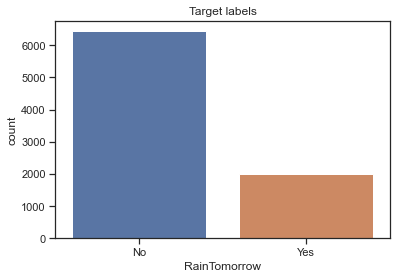

In [27]:
sns.set(style="ticks")
sns.countplot(df.RainTomorrow)
plt.title("Target labels")
plt.show()

From the plot,the dataset is imbalanced,so we use SMOTE analysis.

# Exploratory Data Analysis

In [28]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,12/1/2008,Albury,13.4,13.4,0.6,5.389395,7.632205,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,No,No
1,12/2/2008,Albury,7.4,7.4,0.0,5.389395,7.632205,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,No,No
2,12/3/2008,Albury,12.9,12.9,0.0,5.389395,7.632205,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,No,No
3,12/4/2008,Albury,9.2,9.2,0.0,5.389395,7.632205,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,No,No
4,12/5/2008,Albury,17.5,17.5,1.0,5.389395,7.632205,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,No


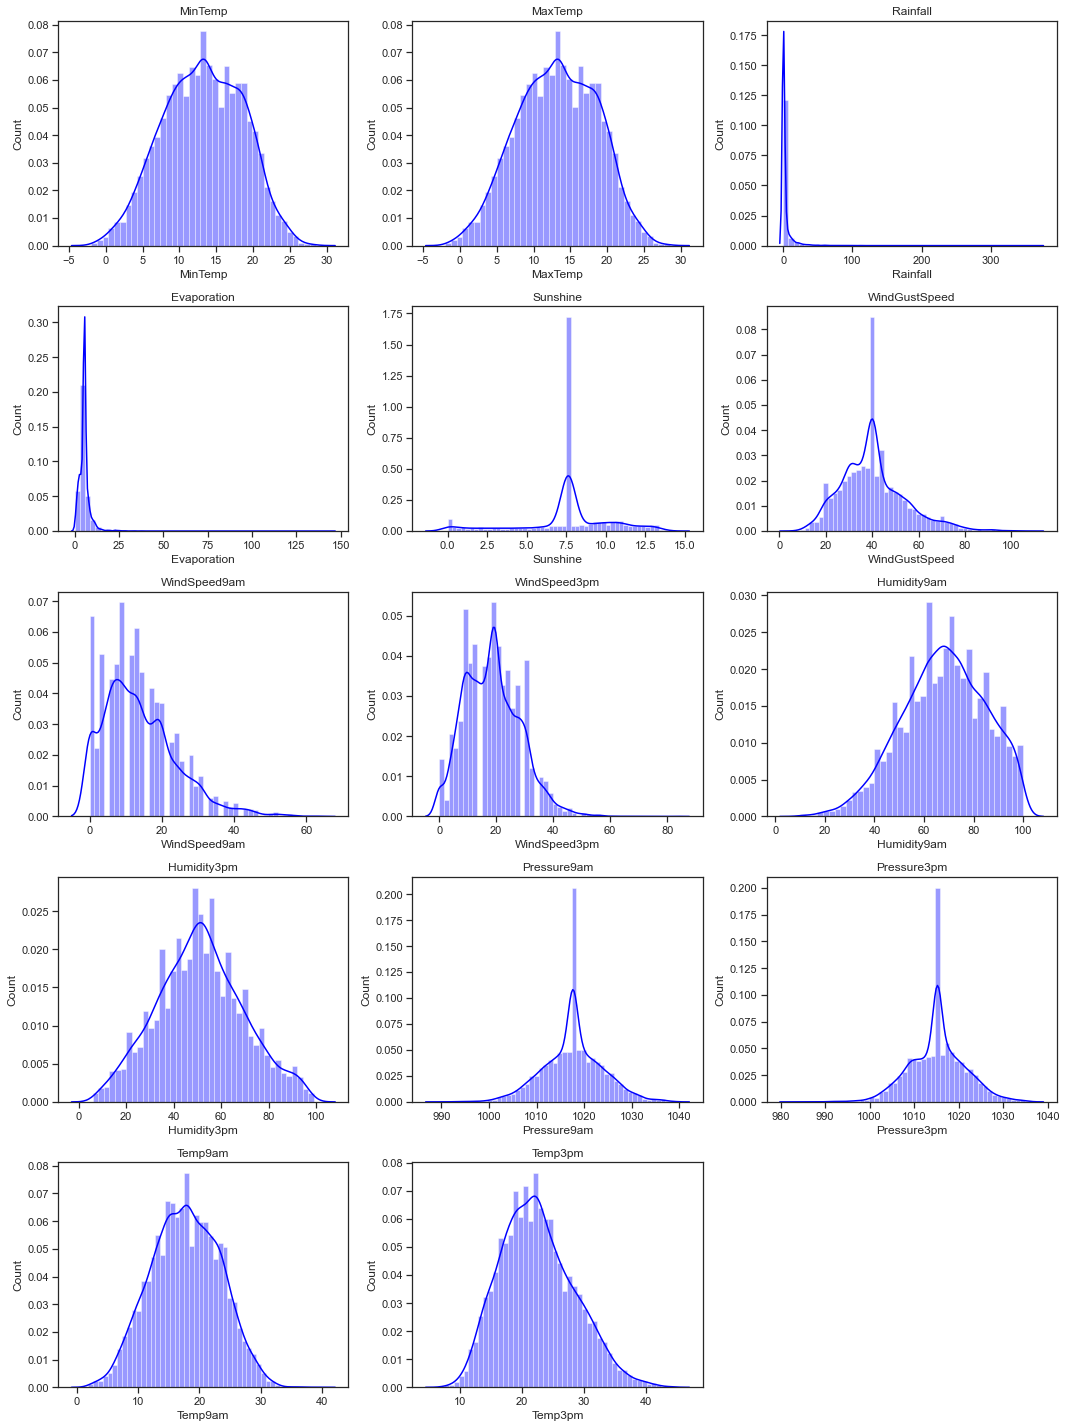

In [29]:
plt.figure(figsize=(15,20))
for i,feature in enumerate(continuous_column):
    data=df.copy()
    plt.subplot(5,3,i+1)
    sns.distplot(df[feature],color='blue')
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
plt.tight_layout()    
plt.show()

Observations:
    From this plot,we have the columns like minitemp,maxtemp,sunshine,windgutsspeed,humidity9am,humidity3pm,pressure9am,pressure3pm,Temp9am and tTemp3pm and the data is not skewed

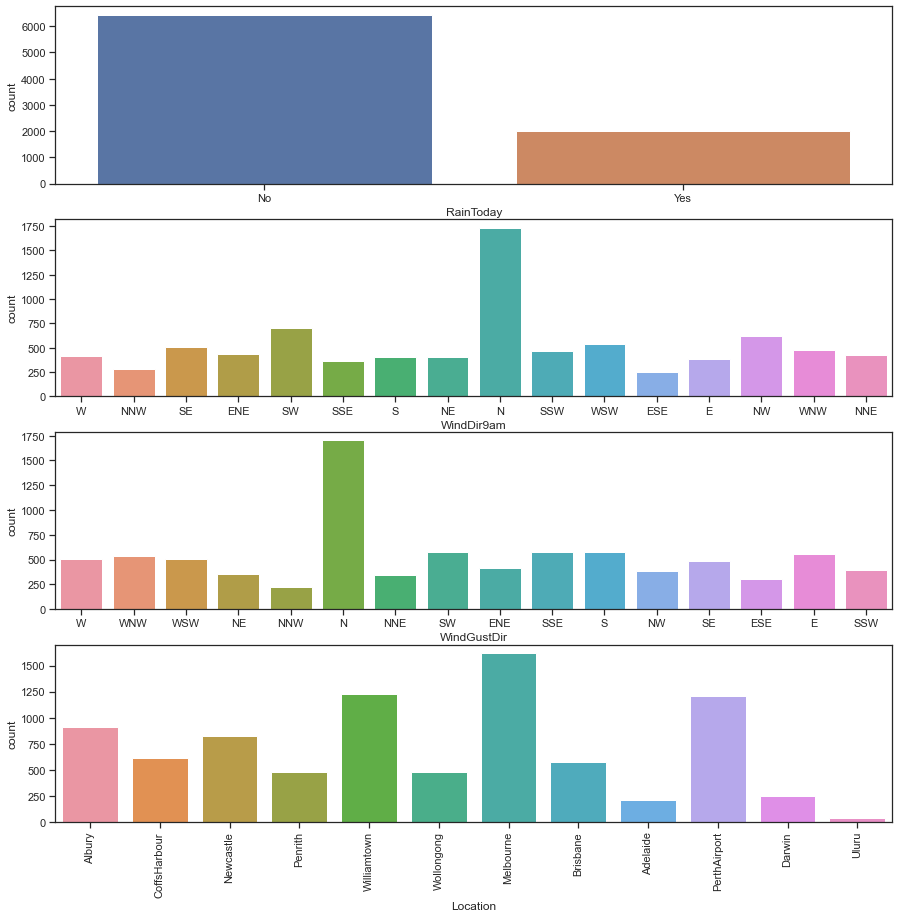

In [30]:
categoricalPlot = ['RainToday', 'WindDir9am','WindGustDir','Location', 'WindDir3pm']
fig, ax = plt.subplots(4, 1, figsize=(15,15))
c=0
while c<=3:
    sns.countplot(df[categoricalPlot[c]], ax=ax[c])
    plt.xticks(rotation=90)
    c+=1
plt.show()

<AxesSubplot:xlabel='MaxTemp', ylabel='MinTemp'>

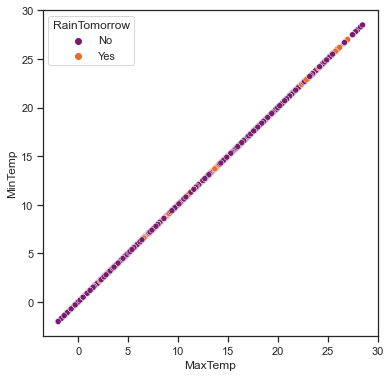

In [31]:
plt.figure(figsize=(6,6))
sns.scatterplot(x='MaxTemp' , y='MinTemp', hue='RainTomorrow', palette='inferno', data=df)

<AxesSubplot:xlabel='Humidity9am', ylabel='Temp9am'>

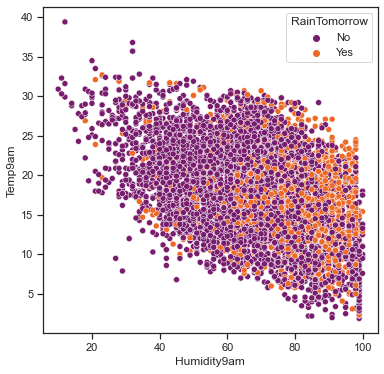

In [32]:
plt.figure(figsize=(6,6))
sns.scatterplot(x='Humidity9am' , y='Temp9am', hue='RainTomorrow', palette='inferno', data=df)

In [33]:
# Converting Date column to date, months and years
# convert the 'Date' column to datetime format
df['Date']= pd.to_datetime(df['Date'])

In [34]:
#adding new column day,month, year in dataframe with dt attribute
df['Day']=df['Date'].dt.day
df['Month']=df['Date'].dt.month
df['Year']=df['Date'].dt.year

In [35]:
#Droping ['Date'] column
df.drop('Date',axis=1,inplace=True)

In [36]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,Albury,13.4,13.4,0.6,5.389395,7.632205,W,44.0,W,WNW,...,1007.1,8.000000,4.503183,16.9,21.8,No,No,1,12,2008
1,Albury,7.4,7.4,0.0,5.389395,7.632205,WNW,44.0,NNW,WSW,...,1007.8,4.566622,4.503183,17.2,24.3,No,No,2,12,2008
2,Albury,12.9,12.9,0.0,5.389395,7.632205,WSW,46.0,W,WSW,...,1008.7,4.566622,2.000000,21.0,23.2,No,No,3,12,2008
3,Albury,9.2,9.2,0.0,5.389395,7.632205,NE,24.0,SE,E,...,1012.8,4.566622,4.503183,18.1,26.5,No,No,4,12,2008
4,Albury,17.5,17.5,1.0,5.389395,7.632205,W,41.0,ENE,NW,...,1006.0,7.000000,8.000000,17.8,29.7,No,No,5,12,2008


In [37]:
df['Year'].value_counts()

2011    1468
2010    1443
2009    1238
2014     959
2012     905
2016     732
2015     653
2013     543
2017     391
2008      93
Name: Year, dtype: int64

In [38]:
df['Month'].value_counts()

6     818
5     801
3     761
1     753
12    741
7     732
8     682
10    655
11    653
2     620
9     609
4     600
Name: Month, dtype: int64

In [39]:
# changeing into 0 and 1 of raintoday and raintomorrow
df['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
df['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

In [40]:
df.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
MinTemp,1.000000,1.000000,0.087684,0.254965,0.056184,0.230058,0.136872,0.178349,-0.130731,0.079048,...,-0.422991,0.091604,0.038414,0.887119,0.685520,0.064789,0.092942,0.009446,-0.245854,0.044123
MaxTemp,1.000000,1.000000,0.087684,0.254965,0.056184,0.230058,0.136872,0.178349,-0.130731,0.079048,...,-0.422991,0.091604,0.038414,0.887119,0.685520,0.064789,0.092942,0.009446,-0.245854,0.044123
Rainfall,0.087684,0.087684,1.000000,0.023517,-0.169432,0.086000,0.050631,0.024791,0.228800,0.235444,...,-0.033649,0.185444,0.150760,-0.007083,-0.090687,0.461106,0.220021,-0.013760,-0.012244,0.006435
Evaporation,0.254965,0.254965,0.023517,1.000000,0.226001,0.136371,0.104294,0.101126,-0.213108,-0.161661,...,-0.189558,-0.062283,-0.108022,0.305264,0.315109,-0.088654,-0.059012,0.013597,0.004362,0.152708
Sunshine,0.056184,0.056184,-0.169432,0.226001,1.000000,-0.013778,-0.018069,0.030145,-0.360831,-0.440268,...,-0.035863,-0.533391,-0.547304,0.250640,0.395324,-0.234230,-0.327731,0.004662,-0.006694,0.065374
WindGustSpeed,0.230058,0.230058,0.086000,0.136371,-0.013778,1.000000,0.600198,0.634939,-0.269593,-0.091860,...,-0.372651,0.023313,0.078631,0.202298,0.102199,0.076822,0.190127,-0.002876,0.051968,-0.042402
WindSpeed9am,0.136872,0.136872,0.050631,0.104294,-0.018069,0.600198,1.000000,0.560660,-0.358391,-0.110587,...,-0.138454,-0.000549,0.058198,0.109798,-0.002606,0.035531,0.068285,-0.003067,0.038427,-0.088489
WindSpeed3pm,0.178349,0.178349,0.024791,0.101126,0.030145,0.634939,0.560660,1.000000,-0.250953,-0.091004,...,-0.207544,0.005061,0.003295,0.184188,0.066087,0.015268,0.053568,-0.008957,0.049483,-0.051466
Humidity9am,-0.130731,-0.130731,0.228800,-0.213108,-0.360831,-0.269593,-0.358391,-0.250953,1.000000,0.633291,...,0.173415,0.404742,0.296862,-0.378344,-0.382401,0.374007,0.271222,0.003799,-0.115530,0.099717
Humidity3pm,0.079048,0.079048,0.235444,-0.161661,-0.440268,-0.091860,-0.110587,-0.091004,0.633291,1.000000,...,0.070369,0.424348,0.439965,-0.130414,-0.491485,0.359219,0.444808,0.012512,-0.074256,-0.028920


<AxesSubplot:>

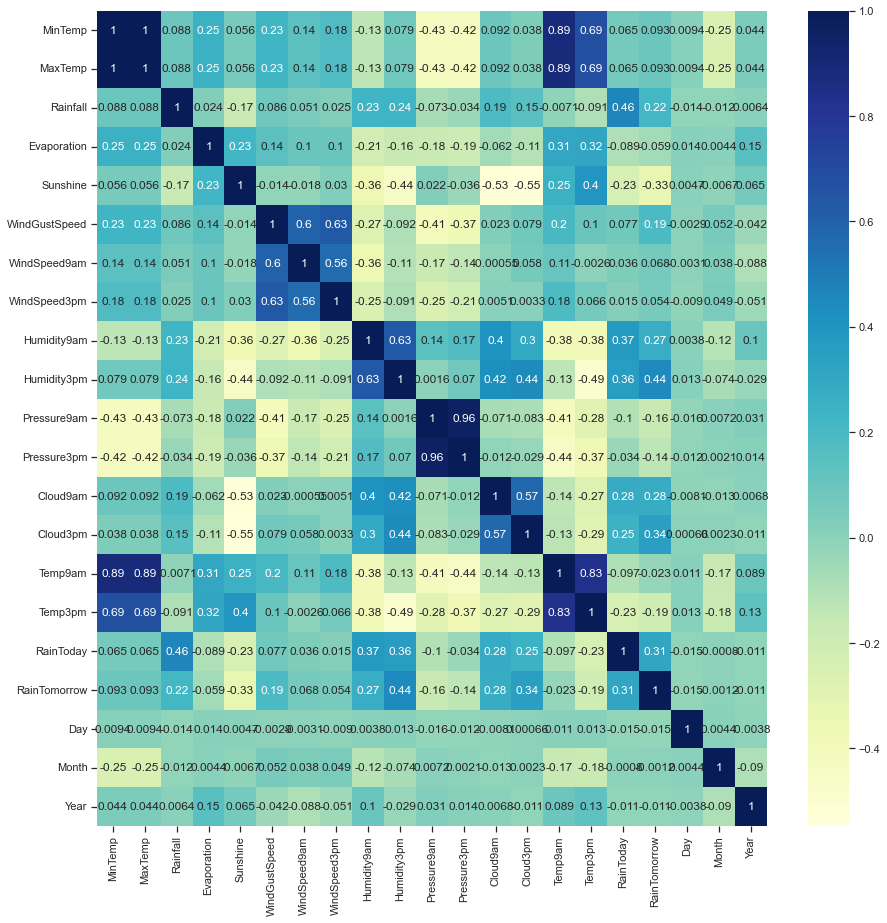

In [41]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),cmap='YlGnBu',annot=True)

from the heat map,we know that there are some multicollinearity among the columns.

# Handling outliers

			BOXPLOT fOR NUMERICAL BEFORE REMOVING OUTLIERS FROM THEM


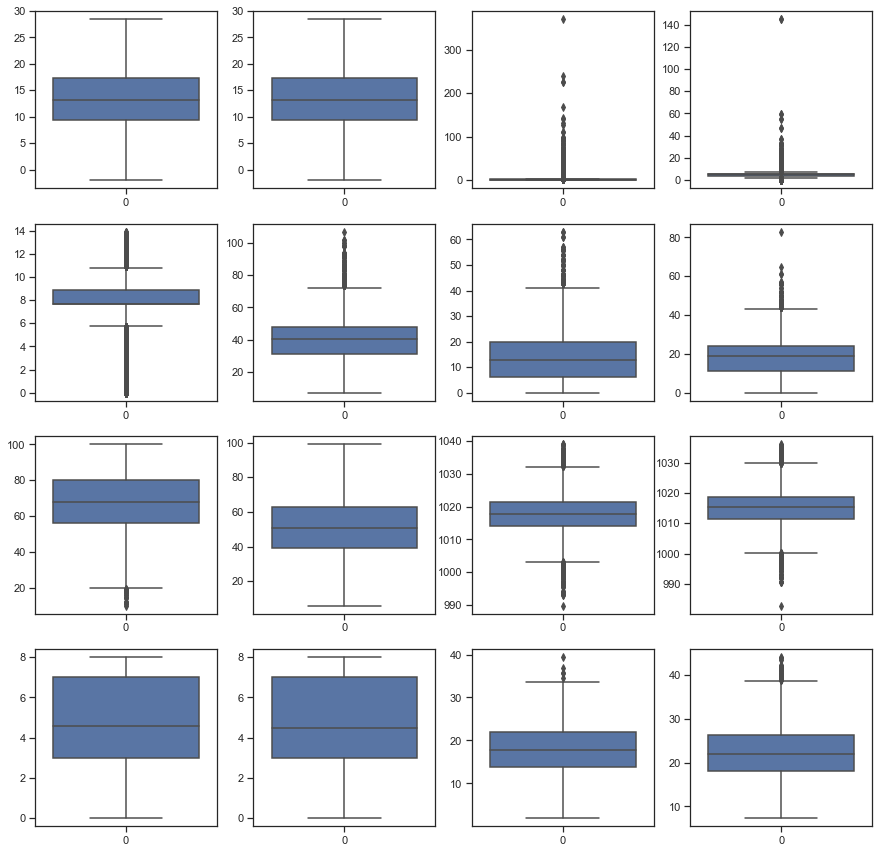

In [42]:
# Checking outliers in Numerical columns

n_rows = 4
n_cols = 4
fig, ax = plt.subplots(n_rows, n_cols, figsize=(15,15))
print('\t\t\tBOXPLOT fOR NUMERICAL BEFORE REMOVING OUTLIERS FROM THEM')
i=0;j=0;k=0;
while i<n_rows:
    while j<n_cols:
        sns.boxplot(data=df[numerical_column[k]], ax=ax[i, j])
        k+=1;j+=1
    j=0;i+=1
    
plt.show()

Removing outliers from numerical columns using IQR method

In [43]:
# Removing Outliers from Numerical Columns
def removeOutliers(numerical_column):
    global df
    for i in range(len(numerical_column)):
        q1 = df[numerical_column[i]].quantile(0.25)
        q3 = df[numerical_column[i]].quantile(0.75)
        IQR = q3-q1
        minimum = q1 - 1.5 * IQR
        maximum = q3 + 1.5 * IQR        
        df.loc[(df[numerical_column[i]] <= minimum), numerical_column[i]] = minimum
        df.loc[(df[numerical_column[i]] >= maximum), numerical_column[i]] = maximum  

In [44]:
removeOutliers(numerical_column)

			BOXPLOT FOR NUMERICAL COLUMNS AFTER REMOVING OUTLIERS FORM THEM:


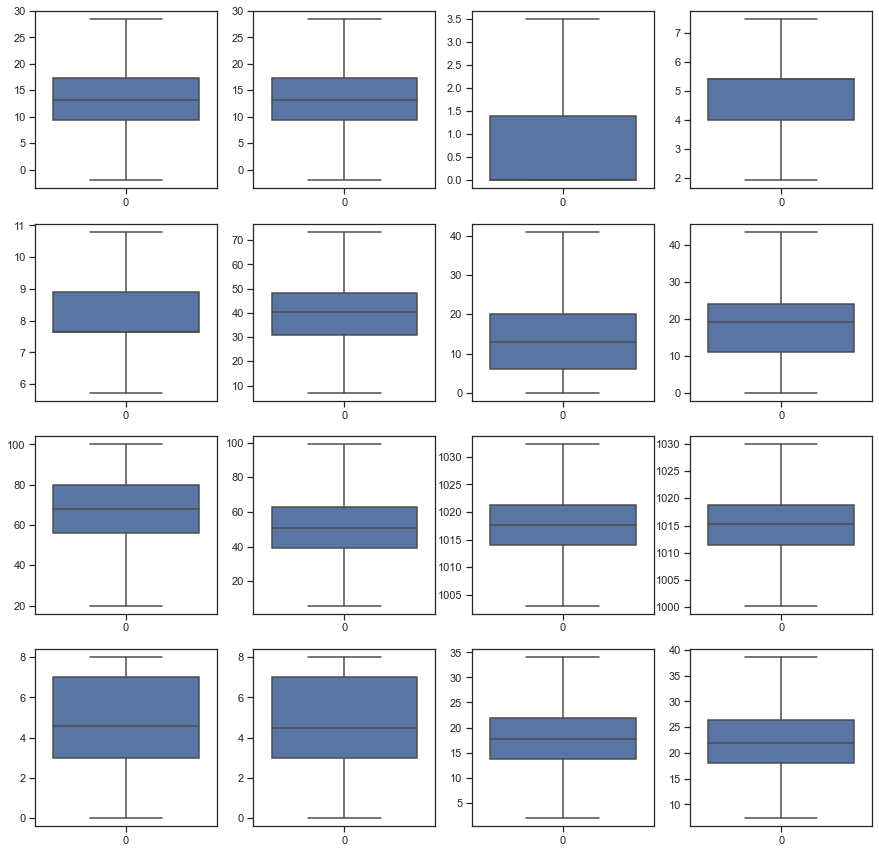

In [46]:
n_rows = 4
n_cols = 4
fig, ax = plt.subplots(n_rows, n_cols, figsize=(15,15))
print('\t\t\tBOXPLOT FOR NUMERICAL COLUMNS AFTER REMOVING OUTLIERS FORM THEM:')
i=0;j=0;k=0;
while i<n_rows:
    while j<n_cols:
        sns.boxplot(data=df[numerical_column[k]], ax=ax[i, j])
        k+=1;j+=1
    j=0;i+=1
plt.show()

In [45]:
# Converting categorical columns using label encoder

WindGustDir_encode = LabelEncoder()
df['Location']=WindGustDir_encode.fit_transform(df['Location'])

WindGustDir_encode = LabelEncoder()
df['WindGustDir']=WindGustDir_encode.fit_transform(df['WindGustDir'])

WindDir9am_encode = LabelEncoder()
df['WindDir9am']=WindDir9am_encode.fit_transform(df['WindDir9am'])

WindDir3pm_encode = LabelEncoder()
df['WindDir3pm']=WindDir3pm_encode.fit_transform(df['WindDir3pm'])

In [46]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,1,13.4,13.4,0.6,5.389395,7.632205,13,44.0,13,14,...,1007.1,8.000000,4.503183,16.9,21.8,0,0,1,12,2008
1,1,7.4,7.4,0.0,5.389395,7.632205,14,44.0,6,15,...,1007.8,4.566622,4.503183,17.2,24.3,0,0,2,12,2008
2,1,12.9,12.9,0.0,5.389395,7.632205,15,46.0,13,15,...,1008.7,4.566622,2.000000,21.0,23.2,0,0,3,12,2008
3,1,9.2,9.2,0.0,5.389395,7.632205,4,24.0,9,0,...,1012.8,4.566622,4.503183,18.1,26.5,0,0,4,12,2008
4,1,17.5,17.5,1.0,5.389395,7.632205,13,41.0,1,7,...,1006.0,7.000000,8.000000,17.8,29.7,0,0,5,12,2008


# Applying SMOTE to correct imbalanced dataset

Separating the features and label variables into x and y

In [47]:
x=df.drop('RainTomorrow', axis=1)
y=df["RainTomorrow"]
y

0       0
1       0
2       0
3       0
4       0
       ..
8420    0
8421    0
8422    0
8423    0
8424    0
Name: RainTomorrow, Length: 8425, dtype: int64

# Oversampling

In [48]:
from imblearn.over_sampling import SMOTE

In [49]:
smt=SMOTE()
sm_x,sm_y=smt.fit_resample(x,y)
print(sm_x.shape)
print(sm_y.shape)

(12868, 24)
(12868,)


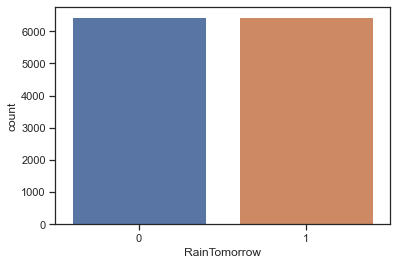

0    6434
1    6434
Name: RainTomorrow, dtype: int64


In [50]:
plt.figure(figsize=(6,4))
sns.countplot(sm_y)
plt.show()
print(sm_y.value_counts())

 There is a lot of multicollinearity among few columns and its difficult to drop column through vif. So applying PCA to drop less important column.

In [51]:
# Import library to perform PCA
from sklearn.decomposition import PCA

In [52]:
pca=PCA(0.90)

In [53]:
x_pca=pca.fit_transform(sm_x)
x_pca.shape

(12868, 7)

In [54]:
#lets create correlation matrix for the principal components
corrmat = np.corrcoef(x_pca.transpose())
corrmat.shape

(7, 7)

<AxesSubplot:>

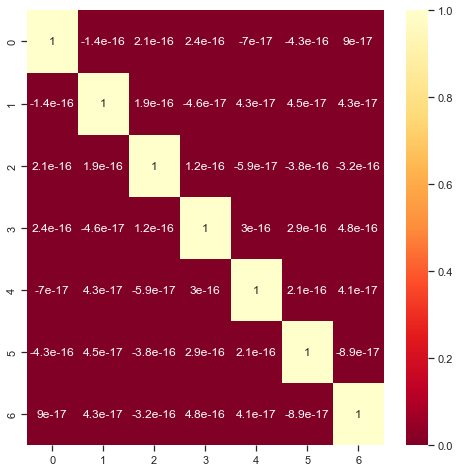

In [55]:
# Plotting heatmap to oserve the correlation between features
plt.figure(figsize=[8,8])
sns.heatmap(corrmat,cmap='YlOrRd_r', annot=True)

# Feature Scaling using Standard Scalarization¶

In [56]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x_pca=scale.fit_transform(x_pca)
x_pca

array([[ 1.14728021, -0.22718963,  1.10061477, ..., -1.63609201,
         0.91850416, -2.38432367],
       [ 1.65591195, -0.62785183,  0.2665073 , ..., -1.35607355,
         2.55497365, -0.71412782],
       [ 1.79809275,  0.0959033 , -0.22633093, ..., -1.33727845,
         1.60059544, -1.77864383],
       ...,
       [-0.41672404,  0.31881853, -1.25979533, ..., -1.6566561 ,
        -0.05352867,  0.69482074],
       [-0.87370611, -0.22634986,  0.45729495, ...,  0.34320139,
        -0.0043814 , -0.33476145],
       [ 0.92905146, -0.18357779, -0.23174727, ...,  1.29166721,
        -0.92223801,  0.48373681]])

# Model Building

In [57]:
#importing necessarry libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [58]:
# Finding Best Random State

maxAcc = 0
maxRS = 0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x_pca,sm_y,random_state=i,test_size=0.30)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predrf= LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print('Best score is',maxAcc,'on Random State',maxRS)

Best score is 0.77000777000777 on Random State 24


# Creating train_test_split

In [59]:
x_train,x_test,y_train,y_test=train_test_split(x_pca,sm_y,test_size=.30,random_state=maxRS)

In [60]:
# Checking train and test data size
print(x_train.shape,'\t',x_test.shape)

(9007, 7) 	 (3861, 7)


In [61]:
print(y_train.shape,'\t',y_test.shape)

(9007,) 	 (3861,)


# Classification Algorithm
1)Decision Tree Classifier
2)Random Forest Classifier
3)Logistic Regression
4)KNeighbors Classifier
5)Gradient Boosting Classifier

In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score

In [63]:
model=[LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print("Train score",m.score(x_train,y_train))
    print('Accuracy score of',m, 'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

Train score 0.7456422782280449
Accuracy score of LogisticRegression() is:
0.77000777000777
[[1498  416]
 [ 472 1475]]
              precision    recall  f1-score   support

           0       0.76      0.78      0.77      1914
           1       0.78      0.76      0.77      1947

    accuracy                           0.77      3861
   macro avg       0.77      0.77      0.77      3861
weighted avg       0.77      0.77      0.77      3861



Train score 0.7493060952592429
Accuracy score of GaussianNB() is:
0.7687127687127687
[[1527  387]
 [ 506 1441]]
              precision    recall  f1-score   support

           0       0.75      0.80      0.77      1914
           1       0.79      0.74      0.76      1947

    accuracy                           0.77      3861
   macro avg       0.77      0.77      0.77      3861
weighted avg       0.77      0.77      0.77      3861



Train score 0.8023759298323526
Accuracy score of SVC() is:
0.7966847966847966
[[1566  348]
 [ 437 1510]]
       

# Ensemble technique

# Random Forest classifier

In [64]:
# Checking accuracy for Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100,random_state=170,criterion='gini')
rfc.fit(x_train,y_train)

# Prediction
predrfc = rfc.predict(x_test)
print("Train score",rfc.score(x_train,y_train))
print("Test score",accuracy_score(y_test, predrfc))
print(confusion_matrix(y_test, predrfc))
print(classification_report(y_test,predrfc))

Train score 1.0
Test score 0.9077959077959078
[[1752  162]
 [ 194 1753]]
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1914
           1       0.92      0.90      0.91      1947

    accuracy                           0.91      3861
   macro avg       0.91      0.91      0.91      3861
weighted avg       0.91      0.91      0.91      3861



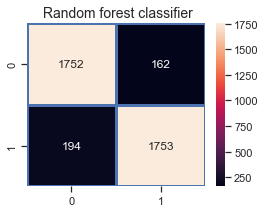

In [65]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, predrfc),
                annot=True,fmt = "d",linecolor="b",linewidths=3)
    
plt.title(" Random forest classifier",fontsize=14)
plt.show()

The model is overfitting as train score is very high and variance between train and test score is also high

# Gradient Boost Classifier

In [66]:
# Checking accuracy for Gradient Boosting Classifier
GBc = GradientBoostingClassifier()
GBc.fit(x_train,y_train)

# Prediction
predGBc = GBc.predict(x_test)
print("Train score",GBc.score(x_train,y_train))
print("Test score",accuracy_score(y_test, predGBc))
print(confusion_matrix(y_test, predGBc))
print(classification_report(y_test,predGBc))

Train score 0.7980459642500277
Test score 0.7852887852887853
[[1527  387]
 [ 442 1505]]
              precision    recall  f1-score   support

           0       0.78      0.80      0.79      1914
           1       0.80      0.77      0.78      1947

    accuracy                           0.79      3861
   macro avg       0.79      0.79      0.79      3861
weighted avg       0.79      0.79      0.79      3861



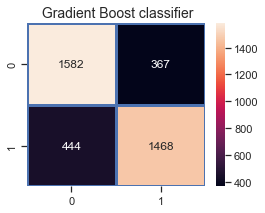

In [77]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, predGBc),
                annot=True,fmt = "d",linecolor="b",linewidths=3)
plt.title(" Gradient Boost classifier",fontsize=14)
plt.show()

 from the train score and test score values both are having good accoracy and the variance between train and test score is almost nil. So we can Select this model.

# Hyper parameter tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV,cross_val_score

# we are checking best parameter which suited most for the model

para = {"n_estimators":[100,200,300,400],
        "learning_rate":[0.1,0.3,0.5],
        "max_depth" :[3,5,7,9,10]}

grid = RandomizedSearchCV(GBc, para, scoring= "accuracy",cv = 5, n_iter=50,n_jobs=-1,verbose=2)

grid.fit(x_train,y_train)
print("Train score",grid.score(x_train,y_train))
print("score",grid.best_score_)
print("best parameter",grid.best_params_)
print("best estimator",grid.best_estimator_)
grid_pred=grid.best_estimator_.predict(x_test) 

Fitting 5 folds for each of 50 candidates, totalling 250 fits


In [69]:
best_parameter_GB = GradientBoostingClassifier(learning_rate=0.3, max_depth=10, n_estimators=400)
for i in range(2,7):
    cv = cross_val_score(GBc,x_pca,sm_y,cv=i)
    print(f'at CV {i} The mean is  {cv.mean()} and the SD is {cv.std()}') 

at CV 2 The mean is  0.7260646565122786 and the SD is 0.02152626670811314
at CV 3 The mean is  0.7252121081685082 and the SD is 0.05080556711571052
at CV 4 The mean is  0.744560149207336 and the SD is 0.040758154251186875
at CV 5 The mean is  0.7515612944295416 and the SD is 0.05090908211540673
at CV 6 The mean is  0.7378885366292084 and the SD is 0.06528392364230223


# Cross validation

In [71]:
# Cross validate of RandomForestClassifier
from sklearn.model_selection import cross_val_score
score=cross_val_score(GBc,x_pca,sm_y,cv=5,scoring='accuracy',verbose=1,n_jobs=-1)
print('Score:', score)
print('Mean Score:', score.mean())
print('Standard Deviation:', score.std())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Score: [0.77583528 0.70512821 0.68259518 0.77069569 0.82316362]
Mean Score: 0.7514835943518415
Standard Deviation: 0.05097954616622155


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   10.7s finished


In [72]:
RainTomorrow =GradientBoostingClassifier(learning_rate=0.5, max_depth=10, n_estimators=400)
RainTomorrow.fit(x_train, y_train)
pred = RainTomorrow.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

89.61408961408961


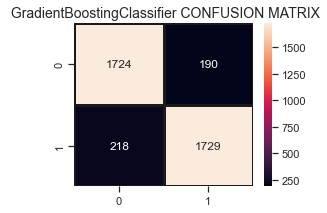

In [73]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, grid_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title(" GradientBoostingClassifier CONFUSION MATRIX",fontsize=14)
plt.show()

# plotting AUC ROC curve

In [74]:
#importing necessary libraries
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [75]:
GBc.fit(x_train,y_train)

GradientBoostingClassifier()

In [76]:
y_pred_prob=GBc.predict_proba(x_test)[:,1]
y_pred_prob

array([0.39524058, 0.74796576, 0.67705008, ..., 0.62187658, 0.89594671,
       0.53081323])

In [78]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [79]:
fpr,tpr,thresholds

(array([0.        , 0.        , 0.        , ..., 0.99425287, 0.99529781,
        1.        ]),
 array([0.00000000e+00, 5.13610683e-04, 2.56805342e-03, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]),
 array([1.97399548, 0.97399548, 0.96090625, ..., 0.03631307, 0.03525608,
        0.02076982]))

In [80]:
auc_score=roc_auc_score(y_test,GBc.predict(x_test))
print(auc_score)

0.7851380550094753


<Figure size 432x288 with 0 Axes>

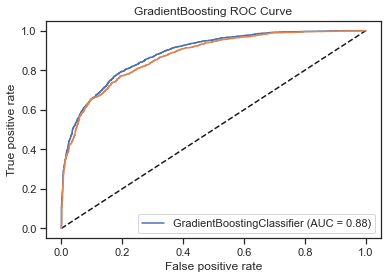

In [81]:
plt.figure(figsize=[6,4])
plot_roc_curve(GBc,x_train,y_train)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='GradientBoostingClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('GradientBoosting ROC Curve')
plt.show()

# conclusion

In [82]:
import numpy as np
a=np.array(y_test)
Predicted=np.array(predGBc)
df_com=pd.DataFrame({'Original':a,'Predicted':Predicted},index=range(len(a)))
df_com

,Original,Predicted
0,1,0
1,1,1
2,0,1
3,0,1
4,0,0
...,...,...
3856,0,0
3857,1,1
3858,0,1
3859,1,1


So,there is a 89% chance of rain can fall on tommorow .

Where ever there will be rainfall, it will be more than 1 mm.

# Model saving

In [83]:
import pickle
filename='Predicted_RainTomorrow.pkl'
pickle.dump(GBc,open(filename,'wb'))